<div class="frontmatter text-center">
<h2> Scientific Python, Fall 2017</h2>
<h2> Roberta Sinatra, Johannes Wachs<h2>
<h3> Homework 6 as of October 30, 2017</h2>
<h3> Tural Karimli<h2>
</div>

### From Class 9

Recall we have two csvs: passengers that we know survived or perished, a new data on passengers without survival information. Predict the chances of survival of these new data points using their age, sex, and pclass. Specifically:

First using the old data:

1) bin the age variable into 3 groups (young, middle-aged, old).

Start the analysis first let's import the appropirate packages.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Now let's read the data

In [3]:
odf=pd.read_csv('titanic.csv',header=0,sep=',')

Let's see the data seems

In [4]:
odf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Lets bin the data according to age groups: the young are those who are below than 30 (30 is included) middle-aged is between 30 and 60 (60 included) and the old is older than 60.

In [5]:
bins = [0,30,60,100]
odf['Age_Group'] = pd.cut(odf['Age'], bins=bins)

2) Calculate the average rate of survival for people in each age/sex/pclass group 

In [6]:
survived_by_class_and_sex=odf.groupby(['Age_Group','Sex','Pclass'])['Survived'].mean()
survived_by_class_and_sex

Age_Group  Sex     Pclass
(0, 30]    female  1         0.942857
                   2         0.931818
                   3         0.506329
           male    1         0.500000
                   2         0.192308
                   3         0.167630
(30, 60]   female  1         0.979167
                   2         0.900000
                   3         0.272727
           male    1         0.412698
                   2         0.090909
                   3         0.118421
(60, 100]  female  1         1.000000
                   3         1.000000
           male    1         0.083333
                   2         0.333333
                   3         0.000000
Name: Survived, dtype: float64

Then on the new data:

3) infer the chance of survival of each of the new passengers using these averages.

In [7]:
ndf= pd.read_csv('titanic2.csv')

In [8]:
bins = [0,30,60,100]
ndf['Age_Group'] = pd.cut(ndf['Age'], bins=bins)

In [10]:
nsurvived_by_class_and_sex=odf.groupby(['Age_Group','Sex','Pclass'])['Survived'].count()
nsurvived_by_class_and_sex

Age_Group  Sex     Pclass
(0, 30]    female  1          35
                   2          44
                   3          79
           male    1          26
                   2          52
                   3         173
(30, 60]   female  1          48
                   2          30
                   3          22
           male    1          63
                   2          44
                   3          76
(60, 100]  female  1           2
                   3           1
           male    1          12
                   2           3
                   3           4
Name: Survived, dtype: int64

In [11]:
inference = (nsurvived_by_class_and_sex*survived_by_class_and_sex)/nsurvived_by_class_and_sex
inference

Age_Group  Sex     Pclass
(0, 30]    female  1         0.942857
                   2         0.931818
                   3         0.506329
           male    1         0.500000
                   2         0.192308
                   3         0.167630
(30, 60]   female  1         0.979167
                   2         0.900000
                   3         0.272727
           male    1         0.412698
                   2         0.090909
                   3         0.118421
(60, 100]  female  1         1.000000
                   3         1.000000
           male    1         0.083333
                   2         0.333333
                   3         0.000000
Name: Survived, dtype: float64

4) plot a histogram of the estimated survivial chances for the new passengers

In [12]:
inference.unstack(1).plot(kind='bar',title='Survival Odds by Sex and Class')

In [13]:
ax=inference.plot(kind='hist')

### From Class 10

Using the Divvy Bike data...

1) Write a function that rounds each start time to the nearest half hour and add such columns to our dataframe as starthalfhour and endhalfhour.

In [2]:
trips=pd.read_csv('divvy_trips_august_2013.csv')

/Users/turalkarimli/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
trips['log_duration']=trips.tripduration.map(lambda x: np.log(x))

In [4]:
trips.starttime= pd.to_datetime(trips.starttime,format="%Y-%m-%d %H:%M")
trips.stoptime= pd.to_datetime(trips.stoptime,format="%m/%d/%Y %H:%M")

In [5]:
stations = pd.read_csv('Divvy_Stations_2013.csv')

In [6]:
#first merge trips and stations  for the starting stations
trips = pd.merge(trips, stations, how='left', left_on='from_station_name', right_on='name')
#then merge trips and stations for the destination stations, added a suffix list for duplicated names
trips =pd.merge(trips, stations, how='inner', left_on='to_station_name', right_on='name', suffixes=['_origin', '_dest'])

In [7]:
station_to_station =trips.groupby(['from_station_name','to_station_name']).trip_id.count().reset_index()
station_to_station.sort_values('trip_id',ascending=False)[0:10]

,from_station_name,to_station_name,trip_id
9736,Lake Shore Dr & Monroe St,Streeter Dr & Illinois St,819
18475,Streeter Dr & Illinois St,Streeter Dr & Illinois St,652
9673,Lake Shore Dr & Monroe St,Lake Shore Dr & Monroe St,638
13067,Millennium Park,Millennium Park,588
12461,Michigan Ave & Oak St,Michigan Ave & Oak St,570
13760,Museum Campus,Museum Campus,549
18404,Streeter Dr & Illinois St,Lake Shore Dr & Monroe St,515
18430,Streeter Dr & Illinois St,Millennium Park,511
9702,Lake Shore Dr & Monroe St,Museum Campus,466
13730,Museum Campus,Lake Shore Dr & Monroe St,463


In [8]:
trips.groupby(['from_station_name','to_station_name']).trip_id

In [9]:
temp=trips.groupby(['from_station_name','to_station_name']).trip_id.count()

In [10]:
temp.reset_index()

,from_station_name,to_station_name,trip_id
0,900 W Harrison,900 W Harrison,14
1,900 W Harrison,Aberdeen St & Jackson Blvd,3
2,900 W Harrison,Aberdeen St & Madison St,1
3,900 W Harrison,Ashland Ave & Wellington Ave,1
4,900 W Harrison,Blue Island Ave & 18th St,6
5,900 W Harrison,California Ave & Division St,1
6,900 W Harrison,California Ave & Milwaukee Ave,1
7,900 W Harrison,Canal St & Harrison St,1
8,900 W Harrison,Canal St & Jackson Blvd,16
9,900 W Harrison,Canal St & Madison St,7


Here we do it


In [11]:
from datetime import timedelta

def round_time(dt, mins=30):
    """
    Rounds a datetime object to its nearest half hour (by default).
    (e.g. 2014-02-01 10:45:13 becomes 2014-02-01 11:00:00)
    """
    dt += timedelta(minutes=mins/2.)
    dt -= timedelta(minutes=dt.minute % mins, seconds=dt.second)
    return dt

In [12]:
trips['starthour'] = trips.starttime.apply(round_time)
trips['stophour'] = trips.stoptime.apply(round_time)

In [13]:
trips[['starttime', 'starthour']].head(5)

,starttime,starthour
0,2013-08-01 00:13:00,2013-08-01 00:00:00
1,2013-08-01 03:43:00,2013-08-01 03:30:00
2,2013-08-01 03:42:00,2013-08-01 03:30:00
3,2013-08-01 03:45:00,2013-08-01 04:00:00
4,2013-08-01 07:45:00,2013-08-01 08:00:00


2) Use the datetime library's .dayofweek method to add the day of the week (i.e. Monday, Tuesday,...) to the dataframe for each trip.



In [14]:
trips['weekdays'] = trips['starttime'].apply(lambda d: d.dayofweek)
trips['hours'] = trips['starttime'].apply(lambda d: d.hour)
by_weekday_hour = trips.groupby(['weekdays', 'hours'])['trip_id'].count().reset_index()
#by_weekday_hour.index.names = ['weekday', 'hour'] # rename MultiIndex

In [15]:
#solution (#2/3):
weekdays = trips['starttime'].apply(lambda d: d.dayofweek)
hours = trips['starttime'].apply(lambda d: d.hour)
by_weekday_hour = trips.groupby([weekdays, hours])['trip_id'].count()
by_weekday_hour.index.names = ['weekday', 'hour'] # rename MultiIndex

3) Groupby day of the week and hours and count the number of trips. Use the unstack method on the grouped frame and plot the result.



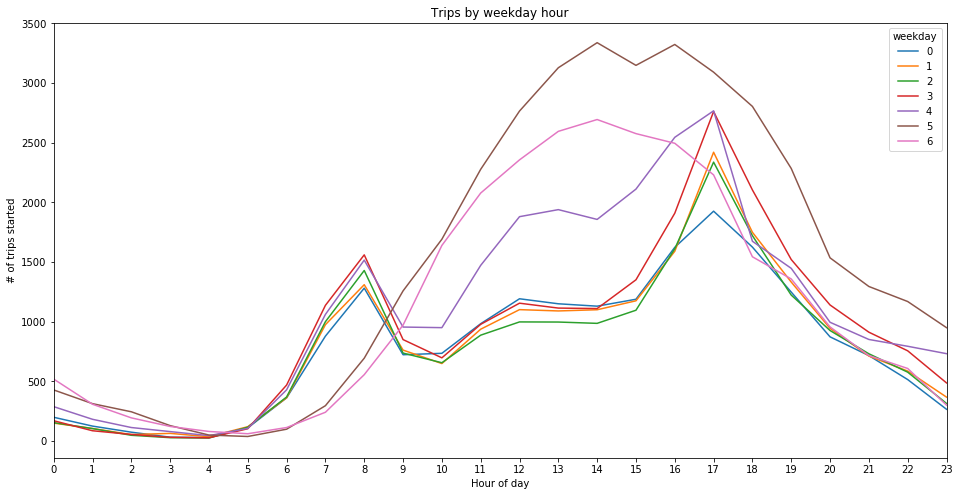

In [18]:
by_weekday_hour.unstack(0).plot(figsize=(16,8))
plt.title('Trips by weekday hour')
plt.ylabel('# of trips started')
plt.xlabel('Hour of day')
plt.xticks(range(24))
plt.xlim(0, 23);

4) Investigate the relationship between station capacity and traffic. Which two stations would you expand if you had the budget? 

In [19]:
tripfrom=trips.groupby(['from_station_name'])['trip_id'].count()

In [20]:
tripto=trips.groupby(['to_station_name'])['trip_id'].count()

In [21]:
traffic=tripfrom+tripto

In [27]:
origincap=trips.groupby(['from_station_name'])['dpcapacity_origin'].count()
departncap=trips.groupby(['to_station_name'])['dpcapacity_dest'].count()

In [29]:
capacity=origincap+departncap

In [30]:
ax=plot(kind='scatter',x='traffic',y='capacity')

NameError: name 'df' is not defined